In [3]:
from manim import *

Manim Community v0.18.1

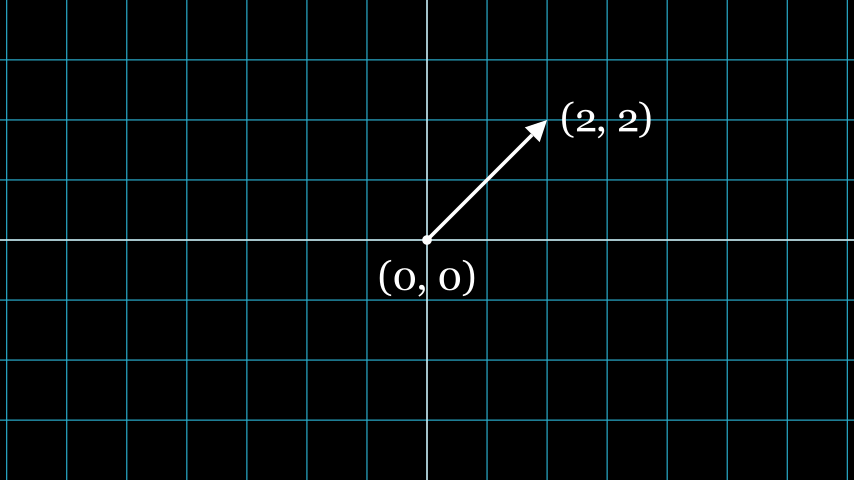

In [4]:
%%manim -ql -v Warning VectorArrow

class VectorArrow(Scene):
    def construct(self):
        dot = Dot(ORIGIN)
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)
        numberplane = NumberPlane()
        origin_text = Text('(0, 0)').next_to(dot, DOWN)
        tip_text = Text('(2, 2)').next_to(arrow.get_end(), RIGHT)
        self.add(numberplane, dot, arrow, origin_text, tip_text)

In [2]:
%%manim -ql -v Warning OpeningManim

class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"This is some \LaTeX")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift=DOWN),
        )
        self.wait()

        transform_title = Tex("That was a transform")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane()
        grid_title = Tex("This is a grid", font_size=72)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)  # Make sure title is on top of grid
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=UP),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"That was a non-linear function \\ applied to the grid"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p
                          + np.array(
                    [
                        np.sin(p[1]),
                        np.sin(p[0]),
                        0,
                    ]
                )
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()

UsageError: Cell magic `%%manim` not found.


In [6]:
%%manim -ql -v Warning SineCurveUnitCircle


class SineCurveUnitCircle(Scene):
    # contributed by heejin_park, https://infograph.tistory.com/230
    def construct(self):
        self.show_axis()
        self.show_circle()
        self.move_dot_and_draw_curve()
        self.wait()

    def show_axis(self):
        x_start = np.array([-6,0,0])
        x_end = np.array([6,0,0])

        y_start = np.array([-4,-2,0])
        y_end = np.array([-4,2,0])

        x_axis = Line(x_start, x_end)
        y_axis = Line(y_start, y_end)

        self.add(x_axis, y_axis)
        self.add_x_labels()

        self.origin_point = np.array([-4,0,0])
        self.curve_start = np.array([-3,0,0])

    def add_x_labels(self):
        x_labels = [
            MathTex("\pi"), MathTex("2 \pi"),
            MathTex("3 \pi"), MathTex("4 \pi"),
        ]

        for i in range(len(x_labels)):
            x_labels[i].next_to(np.array([-1 + 2*i, 0, 0]), DOWN)
            self.add(x_labels[i])

    def show_circle(self):
        circle = Circle(radius=1)
        circle.move_to(self.origin_point)
        self.add(circle)
        self.circle = circle

    def move_dot_and_draw_curve(self):
        orbit = self.circle
        origin_point = self.origin_point

        dot = Dot(radius=0.08, color=YELLOW)
        dot.move_to(orbit.point_from_proportion(0))
        self.t_offset = 0
        rate = 0.25

        def go_around_circle(mob, dt):
            self.t_offset += (dt * rate)
            # print(self.t_offset)
            mob.move_to(orbit.point_from_proportion(self.t_offset % 1))

        def get_line_to_circle():
            return Line(origin_point, dot.get_center(), color=BLUE)

        def get_line_to_curve():
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            return Line(dot.get_center(), np.array([x,y,0]), color=YELLOW_A, stroke_width=2 )


        self.curve = VGroup()
        self.curve.add(Line(self.curve_start,self.curve_start))
        def get_curve():
            last_line = self.curve[-1]
            x = self.curve_start[0] + self.t_offset * 4
            y = dot.get_center()[1]
            new_line = Line(last_line.get_end(),np.array([x,y,0]), color=YELLOW_D)
            self.curve.add(new_line)

            return self.curve

        dot.add_updater(go_around_circle)

        origin_to_circle_line = always_redraw(get_line_to_circle)
        dot_to_curve_line = always_redraw(get_line_to_curve)
        sine_curve_line = always_redraw(get_curve)

        self.add(dot)
        self.add(orbit, origin_to_circle_line, dot_to_curve_line, sine_curve_line)
        self.wait(8.5)

        dot.remove_updater(go_around_circle)

Manim Community v0.18.1

Manim Community v0.18.1

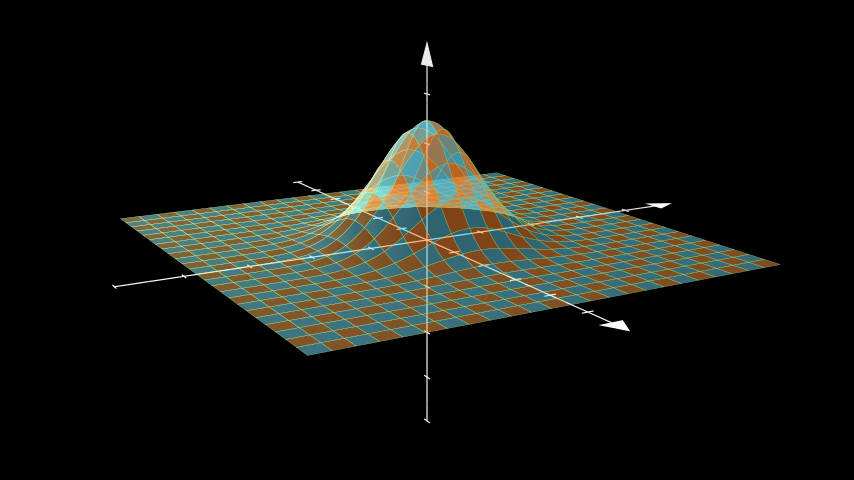

In [2]:
%%manim -ql -v Warning ThreeDSurfacePlot

class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        resolution_fa = 24
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_gauss(u, v):
            x = u
            y = v
            sigma, mu = 0.4, [0.0, 0.0]
            d = np.linalg.norm(np.array([x - mu[0], y - mu[1]]))
            z = np.exp(-(d ** 2 / (2.0 * sigma ** 2)))
            return np.array([x, y, z])

        gauss_plane = Surface(
            param_gauss,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-2, +2],
            u_range=[-2, +2]
        )

        gauss_plane.scale(2, about_point=ORIGIN)
        gauss_plane.set_style(fill_opacity=1,stroke_color=GREEN)
        gauss_plane.set_fill_by_checkerboard(ORANGE, BLUE, opacity=0.5)
        axes = ThreeDAxes()
        self.add(axes,gauss_plane)